# Impact of the scale on the linear regression model

## Preparation of data

### Import data

In [215]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('loyer_paris.csv', sep=';')

In [217]:

df.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2021,10,49,Salpêtrière,2,Avant 1946,non meublé,24.9,29.88,17.43,PARIS,7511349,"{""coordinates"": [[[2.3563634530819235, 48.8310...","48.83740588522814,2.3633186351497173"
1,2021,3,32,Europe,2,Avant 1946,meublé,28.7,34.44,20.09,PARIS,7510832,"{""coordinates"": [[[2.3122934012325604, 48.8733...","48.87814767585103,2.317174611304884"
2,2021,14,47,Bercy,3,1971-1990,non meublé,19.1,22.92,13.37,PARIS,7511247,"{""coordinates"": [[[2.3911410378394717, 48.8261...","48.8352090498651,2.3862100842120184"
3,2021,13,80,Charonne,4,Avant 1946,meublé,23.0,27.60,16.10,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303528,2.4074303282359684"
4,2021,3,62,Muette,4,1971-1990,meublé,28.0,33.60,19.60,PARIS,7511662,"{""coordinates"": [[[2.245624861250342, 48.87635...","48.86327454383972,2.2599358317048384"


### Clean data

In [218]:
df = df[['ville', 'nom_quartier', 'min', 'max',"ref","piece","meuble_txt","epoque","annee"]]
df.head(5)

,ville,nom_quartier,min,max,ref,piece,meuble_txt,epoque,annee
0,PARIS,Salpêtrière,17.43,29.88,24.9,2,non meublé,Avant 1946,2021
1,PARIS,Europe,20.09,34.44,28.7,2,meublé,Avant 1946,2021
2,PARIS,Bercy,13.37,22.92,19.1,3,non meublé,1971-1990,2021
3,PARIS,Charonne,16.10,27.60,23.0,4,meublé,Avant 1946,2021
4,PARIS,Muette,19.60,33.60,28.0,4,meublé,1971-1990,2021


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12800 entries, 0 to 12799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ville         12800 non-null  object 
 1   nom_quartier  12800 non-null  object 
 2   min           12800 non-null  float64
 3   max           12800 non-null  float64
 4   ref           12800 non-null  float64
 5   piece         12800 non-null  int64  
 6   meuble_txt    12800 non-null  object 
 7   epoque        12800 non-null  object 
 8   annee         12800 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 900.1+ KB


## Some visualisation

### Median of Price / Number of Piece

<Axes: xlabel='piece', ylabel='min'>

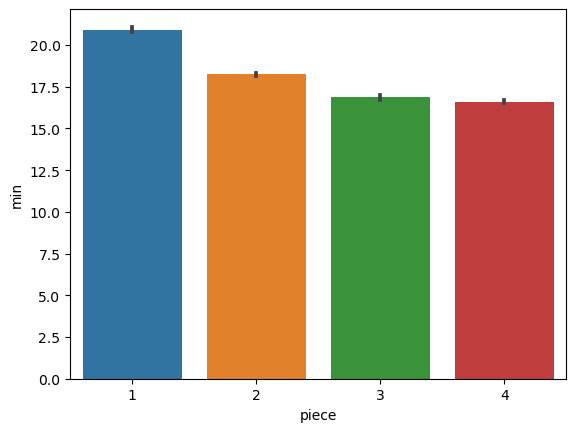

In [220]:
sns.barplot(x="piece", y="min", data=df, estimator=np.median)

## Create modele of Linear Regression

In [221]:
# Choix de caractéristiques
df_encoded = pd.get_dummies(df, columns=['epoque','meuble_txt'])

features = ['piece', 'annee']
all_features = features + [col for col in df_encoded.columns if col not in df.columns]

X = df_encoded[all_features].values

y = df['ref'].values

### Split dataSet for LinearRegression

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Model without scaling

In [223]:
# Utilizes raw data without any scaling or normalization applied.
model_without_scaling = LinearRegression()
model_without_scaling.fit(X_train, y_train)

# Predictions and performance
predictions_without_scaling = model_without_scaling.predict(X_test)
mse_without_scaling = mean_squared_error(y_test, predictions_without_scaling)
r2_without_scaling = r2_score(y_test, predictions_without_scaling)


### Model with standard scaling

In [224]:
# StandardScaler: Scales features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train_scaled_standard = scaler.fit_transform(X_train)
X_test_scaled_standard = scaler.transform(X_test)

# Linear Regression with scaling
model_with_standard_scaling = LinearRegression()
model_with_standard_scaling.fit(X_train_scaled_standard, y_train)

# Predictions and performance
predictions_with_standard_scaling = model_with_standard_scaling.predict(X_test_scaled_standard)
mse_with_standard_scaling = mean_squared_error(y_test, predictions_with_standard_scaling)
r2_with_standard_scaling = r2_score(y_test, predictions_with_standard_scaling)


### Model with Robust scaling

In [225]:
# RobustScaler: Scales features using statistics that are robust to outliers, by removing the median and scaling according to the interquartile range.
scaler = RobustScaler()
X_train_scaled_robust = scaler.fit_transform(X_train)
X_test_scaled_robust = scaler.transform(X_test)

# Linear Regression with scaling
model_with_robust_scaling = LinearRegression()
model_with_robust_scaling.fit(X_train_scaled_robust, y_train)

# Predictions and performance
predictions_with_robust_scaling = model_with_robust_scaling.predict(X_test_scaled_robust)
mse_with_robust_scaling = mean_squared_error(y_test, predictions_with_robust_scaling)
r2_with_robust_scaling = r2_score(y_test, predictions_with_robust_scaling)


### Model with MinMax scaling

In [226]:
# Transforms features by scaling each feature to a given range, typically between zero and one.
scaler = MinMaxScaler()
X_train_scaled_minmax = scaler.fit_transform(X_train)
X_test_scaled_minmax = scaler.transform(X_test)

# Linear Regression with scaling
model_with_MinMax_scaling = LinearRegression()
model_with_MinMax_scaling.fit(X_train_scaled_minmax, y_train)

# Predictions and performance
predictions_with_MinMax_scaling = model_with_MinMax_scaling.predict(X_test_scaled_minmax)
mse_with_MinMax_scaling = mean_squared_error(y_test, predictions_with_MinMax_scaling)
r2_with_MinMax_scaling = r2_score(y_test, predictions_with_MinMax_scaling)


## Visualizing results

### Impacts of each scaling on the models

In [227]:
print("Model without Scaling: MSE =", mse_without_scaling, "R2 =", r2_without_scaling)
print("Model with standard Scaling: MSE =", mse_with_standard_scaling, "R2 =", r2_with_standard_scaling)
print("Model with robust Scaling: MSE =", mse_with_robust_scaling, "R2 =", r2_with_robust_scaling)
print("Model with minmax Scaling: MSE =", mse_with_MinMax_scaling, "R2 =", r2_with_MinMax_scaling)

Model without Scaling: MSE = 8.793950954437255 R2 = 0.5141240833030121
Model with standard Scaling: MSE = 8.784872196885022 R2 = 0.5146256951121996
Model with robust Scaling: MSE = 8.79383887475729 R2 = 0.5141302758343929
Model with minmax Scaling: MSE = 8.802182327270508 R2 = 0.5136692904753339


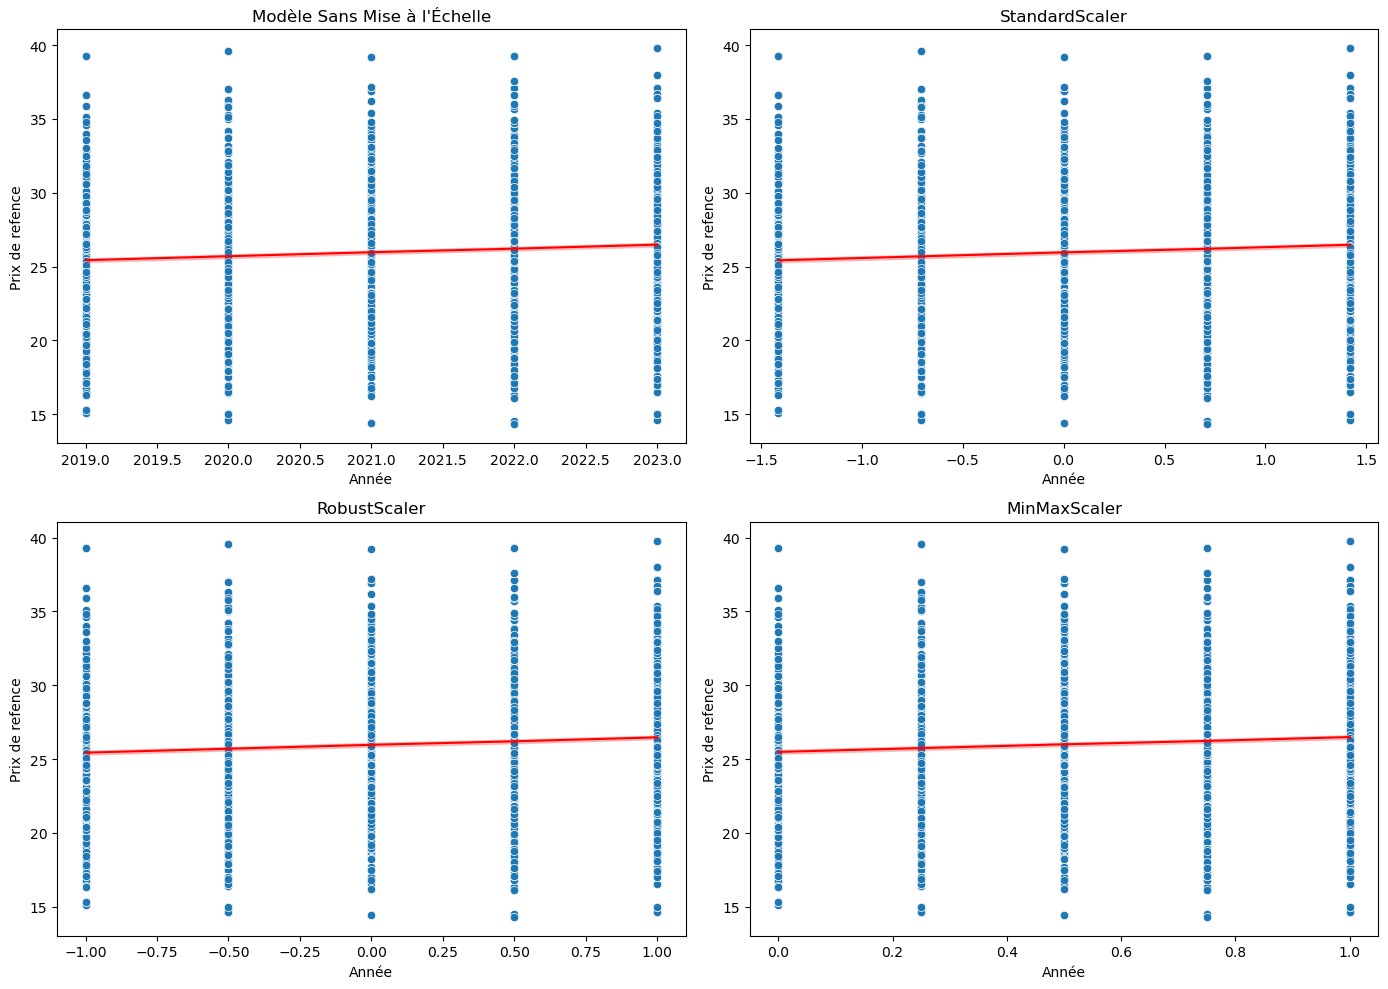

In [232]:
# Configuration de la taille du graphique
plt.figure(figsize=(14, 10))

# Fonction pour tracer un scatter plot avec ligne de régression
def plot_regression(ax, X, y, model, title):
    sns.scatterplot(x=X[:, 1], y=y, ax=ax)  # Scatter plot des données
    line = model.predict(X)  # Prédictions du modèle
    sns.lineplot(x=X[:, 1], y=line, color='red', ax=ax)  # Ligne de régression
    ax.set_title(title)
    ax.set_xlabel('Année')
    ax.set_ylabel('Prix de refence')

# Subplot without scaling
ax1 = plt.subplot(2, 2, 1)
plot_regression(ax1, X_train, y_train, model_without_scaling, 'Modèle Sans Mise à l\'Échelle')

# Subplot with StandardScaler
ax2 = plt.subplot(2, 2, 2)
plot_regression(ax2, X_train_scaled_standard, y_train, model_with_standard_scaling, 'StandardScaler')

# Subplot with RobustScaler
ax3 = plt.subplot(2, 2, 3)
plot_regression(ax3, X_train_scaled_robust, y_train, model_with_robust_scaling, 'RobustScaler')

# Subplot with MinMaxScaler
ax4 = plt.subplot(2, 2, 4)
plot_regression(ax4, X_train_scaled_minmax, y_train, model_with_MinMax_scaling, 'MinMaxScaler')

plt.tight_layout()
plt.show()


### Impact of the scaling on data

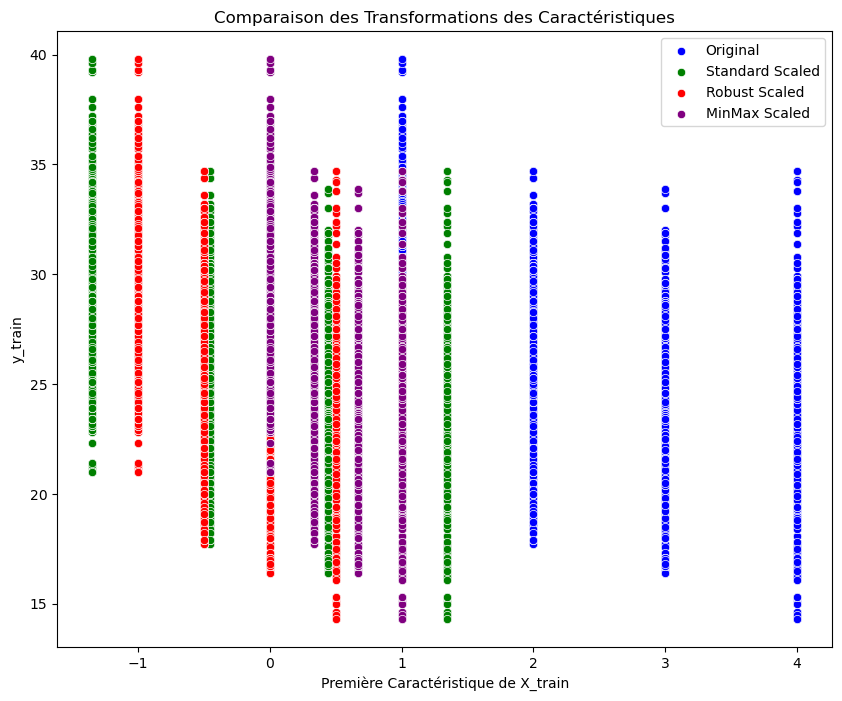

In [234]:
# Configuration de la taille du graphique
plt.figure(figsize=(10, 8))

# Without scaling
sns.scatterplot(x=X_train[:, 0], y=y_train, label='Original', color='blue')

# StandardScaler
sns.scatterplot(x=X_train_scaled_standard[:, 0], y=y_train, label='Standard Scaled', color='green')

# RobustScaler
sns.scatterplot(x=X_train_scaled_robust[:, 0], y=y_train, label='Robust Scaled', color='red')

# MinMaxScaler
sns.scatterplot(x=X_train_scaled_minmax[:, 0], y=y_train, label='MinMax Scaled', color='purple')

# In engligh
plt.title('Compare Scaling Methods')
plt.xlabel('Number of Rooms')
plt.ylabel('Reference Price')
plt.legend()
plt.show()


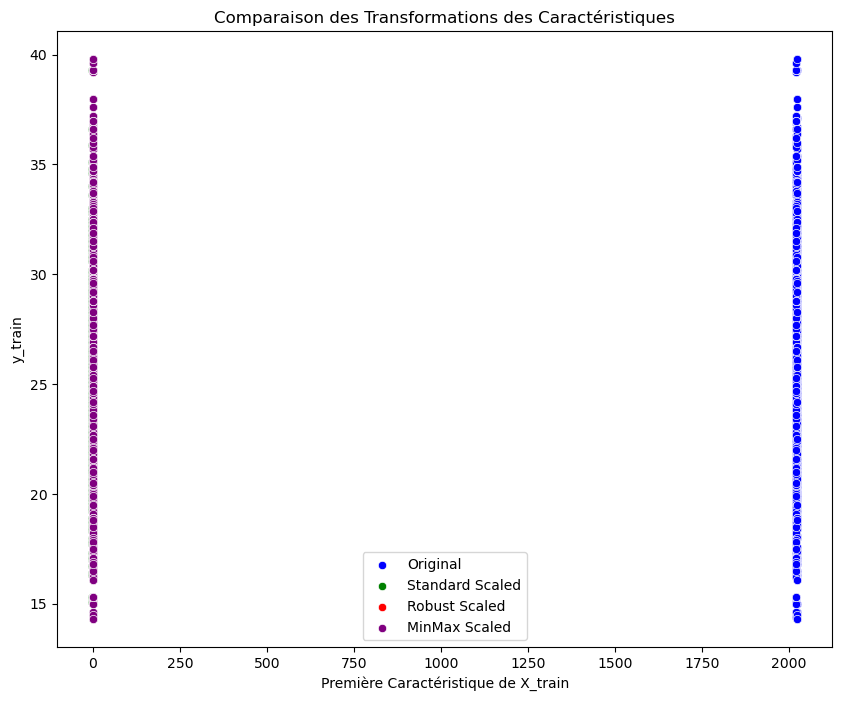

In [235]:
# Configuration de la taille du graphique
plt.figure(figsize=(10, 8))

# Visualisation des données originales
sns.scatterplot(x=X_train[:, 1], y=y_train, label='Original', color='blue')

# Visualisation des données avec StandardScaler
sns.scatterplot(x=X_train_scaled_standard[:, 1], y=y_train, label='Standard Scaled', color='green')

# Visualisation des données avec RobustScaler
sns.scatterplot(x=X_train_scaled_robust[:, 1], y=y_train, label='Robust Scaled', color='red')

# Visualisation des données avec MinMaxScaler
sns.scatterplot(x=X_train_scaled_minmax[:, 1], y=y_train, label='MinMax Scaled', color='purple')

plt.title('Comparaison des Transformations des Caractéristiques')
plt.xlabel('Première Caractéristique de X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()